In [33]:
import pickle
import pandas as pd
import torch

def process_tensor_list(tensor_list):
    # 각 sublist의 텐서를 처리하여 숫자 리스트로 변환
    return [[tensor.detach().numpy().tolist() for tensor in sublist] for sublist in tensor_list]

def process_tensor_field(field):
    # 텐서 필드 처리
    return [[tensor.item() for tensor in sublist[0]] for sublist in field]

with open('targets.pkl', 'rb') as f:
    target_value_list = pickle.load(f)
with open('mean_predictions.pkl', 'rb') as f:
    mean_prediction_list = pickle.load(f)
with open('nearest_predictions.pkl', 'rb') as f:
    temporal_best_prediction_list = pickle.load(f)
with open('top_three_intermediate_predictions.pkl', 'rb') as f:
    intermediate_prediction_list = pickle.load(f)
with open('top_three_optimized_predictions.pkl', 'rb') as f:
    optimized_prediction_list = pickle.load(f)

# 모든 텐서 리스트를 처리
target_value_list = process_tensor_field(target_value_list)
mean_prediction_list = process_tensor_field(mean_prediction_list)
temporal_best_prediction_list = process_tensor_field(temporal_best_prediction_list)
intermediate_prediction_list = process_tensor_list(intermediate_prediction_list)
optimized_prediction_list = process_tensor_list(optimized_prediction_list)

for i in range(10):
    df = pd.DataFrame(
        data=[
            [target_value_list[i][0], mean_prediction_list[i][0], temporal_best_prediction_list[i][0], [sublist[0] for sublist in intermediate_prediction_list][i][0][0], [sublist[1] for sublist in intermediate_prediction_list][i][0][0], [sublist[2] for sublist in intermediate_prediction_list][i][0][0], [sublist[0] for sublist in optimized_prediction_list][i][0][0], [sublist[1] for sublist in optimized_prediction_list][i][0][0], [sublist[2] for sublist in optimized_prediction_list][i][0][0]],
            [target_value_list[i][1], mean_prediction_list[i][1], temporal_best_prediction_list[i][1], [sublist[0] for sublist in intermediate_prediction_list][i][0][1], [sublist[1] for sublist in intermediate_prediction_list][i][0][1], [sublist[2] for sublist in intermediate_prediction_list][i][0][1], [sublist[0] for sublist in optimized_prediction_list][i][0][1], [sublist[1] for sublist in optimized_prediction_list][i][0][1], [sublist[2] for sublist in optimized_prediction_list][i][0][1]]    
            ]
            , index=['PI', 'Do'], columns=['Target', 'Mean', 'Nearest with target', 'Min loss 1', 'Min loss 2', 'Min loss 3', 'Optimized min loss 1', 'Optimized min loss 2', 'Optimized min loss 3']
    )
    print(df)
    df.to_csv('predictions_' + str(i) + '.csv', index=False)

      Target      Mean  Nearest with target  Min loss 1  Min loss 2  \
PI  0.200000  0.370767             0.211078    0.179353    0.211078   
Do  0.310345  0.305098             0.300882    0.418706    0.300882   

    Min loss 3  Optimized min loss 1  Optimized min loss 2  \
PI    0.204492              0.144874              0.175290   
Do    0.409946              0.431168              0.332977   

    Optimized min loss 3  
PI              0.170287  
Do              0.431817  
      Target      Mean  Nearest with target  Min loss 1  Min loss 2  \
PI  0.800000  0.668846             0.801845    0.647522    0.579518   
Do  0.103448  0.134484             0.102371    0.175046    0.205077   

    Min loss 3  Optimized min loss 1  Optimized min loss 2  \
PI    0.656641              0.698226              0.630591   
Do    0.104182              0.121779              0.161898   

    Optimized min loss 3  
PI              0.707254  
Do              0.055101  
      Target      Mean  Nearest with

In [19]:
import pandas as pd

# 데이터프레임 생성 시 행 이름 지정
df = pd.DataFrame(data=[[1, 2], [3, 4]], index=['row1', 'row2'], columns=['A', 'B'])
print(df)

# 데이터프레임 생성 후 행 이름 수정
df.index = ['row3', 'row4']
print(df)


      A  B
row1  1  2
row2  3  4
      A  B
row3  1  2
row4  3  4


In [40]:
import pickle
import pandas as pd
import numpy as np

with open('./dataset/test_dataset1-2.pkl', 'rb') as f:
    sample_test_dataset = pickle.load(f)

print(sample_test_dataset.input)

tensor([[0.4000, 0.1379, 0.0000, 0.8167],
        [0.4000, 0.1379, 0.3333, 0.9000],
        [0.4000, 0.1379, 0.3333, 0.2000],
        [0.4000, 0.1379, 1.0000, 0.7833],
        [0.4000, 0.1379, 0.3333, 0.2333],
        [0.4000, 0.1379, 0.7778, 0.2500],
        [0.4000, 0.1379, 1.0000, 0.4333],
        [0.4000, 0.1379, 0.8889, 0.1000],
        [0.4000, 0.1379, 0.5556, 0.2167],
        [0.4000, 0.1379, 0.1111, 0.9667],
        [0.4000, 0.1379, 1.0000, 0.1667],
        [0.4000, 0.1379, 0.0000, 0.0000],
        [0.4000, 0.1379, 0.7778, 0.0000],
        [0.4000, 0.1379, 0.0000, 0.3833],
        [0.4000, 0.1379, 0.2222, 0.6667],
        [0.4000, 0.1379, 0.1111, 0.0667],
        [0.4000, 0.1379, 1.0000, 0.8167],
        [0.4000, 0.1379, 0.6667, 0.4167],
        [0.4000, 0.1379, 0.1111, 0.9833],
        [0.4000, 0.1379, 0.3333, 0.6667]])


In [43]:
import pickle
import pandas as pd
import numpy as np

with open('./dataset/test_dataset2-1.pkl', 'rb') as f:
    sample_test_dataset = pickle.load(f)

inputs_tensor = sample_test_dataset.input
inputs_array = inputs_tensor.numpy()
target_tensor = sample_test_dataset.target
target_array = target_tensor.numpy()

inputs_df = pd.DataFrame({
    'intensity': inputs_array[:, 0],
    'PI': target_array[:, 0],
    'Do': target_array[:, 1],
    'exposure_time': inputs_array[:, 1],
    'cured_height': inputs_array[:, 2],
})

# DataFrame 확인
print(inputs_df)

# 필요하다면 DataFrame을 CSV 파일로 저장
inputs_df.to_csv('sample_inputs_data.csv', index=False)

    intensity   PI        Do  exposure_time  cured_height
0    0.000000  0.8  0.103448       0.816667      0.027778
1    0.333333  0.8  0.103448       0.900000      0.381944
2    0.333333  0.8  0.103448       0.200000      0.000000
3    1.000000  0.8  0.103448       0.783333      0.562500
4    0.333333  0.8  0.103448       0.233333      0.048611
5    0.777778  0.8  0.103448       0.250000      0.236111
6    1.000000  0.8  0.103448       0.433333      0.423611
7    0.888889  0.8  0.103448       0.100000      0.020833
8    0.555556  0.8  0.103448       0.216667      0.131944
9    0.111111  0.8  0.103448       0.966667      0.243056
10   1.000000  0.8  0.103448       0.166667      0.180556
11   0.000000  0.8  0.103448       0.000000      0.000000
12   0.777778  0.8  0.103448       0.000000      0.000000
13   0.000000  0.8  0.103448       0.383333      0.000000
14   0.222222  0.8  0.103448       0.666667      0.243056
15   0.111111  0.8  0.103448       0.066667      0.000000
16   1.000000 

In [54]:
import pickle
import pandas as pd
import numpy as np
from torch import nn, optim
from model import ResidualNet
from torch.utils.data import DataLoader

with open('./dataset/test_dataset2-1.pkl', 'rb') as f:
    sample_test_dataset = pickle.load(f)

model2 = ResidualNet(12, 3, 64, 2)
model2.load_state_dict(torch.load('./trained model/model2-1.pt'))
test_loader = DataLoader(sample_test_dataset, batch_size=1, shuffle=False)

model2.eval()
output_array = []
loss_fn = torch.nn.MSELoss()
with torch.no_grad():
    for inputs, target in test_loader:
        outputs = model2(inputs)
        loss = loss_fn(target, outputs)
        output_array.append(outputs[0].tolist())

output_array= np.array(output_array)
inputs_tensor = sample_test_dataset.input
inputs_array = inputs_tensor.numpy()

inputs_df = pd.DataFrame({
    'intensity': inputs_array[:, 0],
    'PI': output_array[:, 0],
    'Do': output_array[:, 1],
    'exposure_time': inputs_array[:, 1],
    'cured_height': inputs_array[:, 2],
})

# DataFrame 확인
print(inputs_df)

# 필요하다면 DataFrame을 CSV 파일로 저장
inputs_df.to_csv('sample_outputs_data.csv', index=False)

    intensity        PI        Do  exposure_time  cured_height
0    0.000000  0.808708  0.070572       0.816667      0.027778
1    0.333333  0.801845  0.102371       0.900000      0.381944
2    0.333333  0.433895  0.249705       0.200000      0.000000
3    1.000000  0.841424  0.053210       0.783333      0.562500
4    0.333333  0.760776  0.063951       0.233333      0.048611
5    0.777778  0.656641  0.104182       0.250000      0.236111
6    1.000000  0.815849  0.066615       0.433333      0.423611
7    0.888889  0.647522  0.175046       0.100000      0.020833
8    0.555556  0.723699  0.074403       0.216667      0.131944
9    0.111111  0.708603  0.083988       0.966667      0.243056
10   1.000000  0.745458  0.059261       0.166667      0.180556
11   0.000000  0.452231  0.220631       0.000000      0.000000
12   0.777778  0.548399  0.293219       0.000000      0.000000
13   0.000000  0.478468  0.222763       0.383333      0.000000
14   0.222222  0.666500  0.115035       0.666667      0

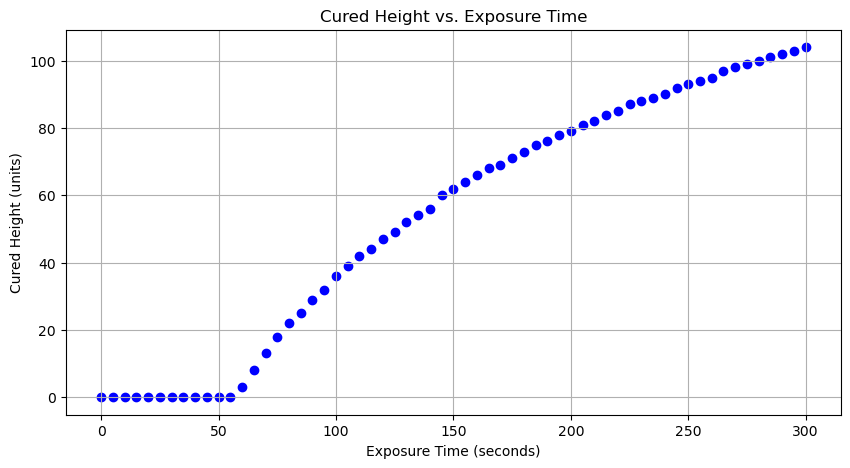

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from dataset import *
df_origin = pd.read_csv('./data_origin_scale.csv')

unique_combinations = df_origin[['PI', 'Do', 'intensity']].drop_duplicates()
selected_combination = unique_combinations.sample(n=1)
selected_rows = df_origin[(df_origin['PI'] == selected_combination.iloc[0]['PI']) & (df_origin['Do'] == selected_combination.iloc[0]['Do']) & (df_origin['intensity'] == selected_combination.iloc[0]['intensity'])]

plt.figure(figsize=(10, 5))
plt.scatter(selected_rows['exposure_time'], selected_rows['cured_height'], color='blue')
plt.title('Cured Height vs. Exposure Time')
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Cured Height (units)')
plt.grid(True)
plt.show()